# BE noté -- Fondations statistiques du Machine Learning

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *Efficiency_Observations.csv* A l'aide de modèles de régression linéaire et de tests statistiques, nous allons alors évaluer :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

Afin de résoudre le problème, deux hypothèses seront effectuées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution des erreurs de ce modèle est supposée suivre une loi Normale centrée.


La démarche pour répondre à ces questions sera commentée dans le notebook rendu, quels qu'en soient ses résultats.


Conseil : Avant de définir une stratégie de résolution, il est recommandé de visualiser les données de *Efficiency_Observations.csv* en distinguant bien les observations obtenues dans les groupes *Brand_1* et *Brand_2*.



In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


df=pandas.read_csv("./Efficiency_Observations.csv",sep=',')

In [2]:
df.head()

,Brand,Concentration,Efficiency
0,Brand_1,3.9479,3.2224
1,Brand_1,1.7838,1.5127
2,Brand_1,7.4415,4.3736
3,Brand_1,8.5625,5.2151
4,Brand_1,9.8002,5.4256


In [3]:
from sklearn.linear_model import LinearRegression

#We sort data by brand of motor
df_b1 = df[df['Brand'] == 'Brand_1']
df_b2 = df[df['Brand'] == 'Brand_2']

#We compute a linear regression for each brand
lr1 = LinearRegression()
X1 = np.array(df_b1['Concentration']).reshape(-1, 1)
y1 = np.array(df_b1['Efficiency']).reshape(-1,1)
lr1.fit(X1,y1)


lr2 = LinearRegression()
X2 = np.array(df_b2['Concentration']).reshape(-1, 1)
y2 = np.array(df_b2['Efficiency']).reshape(-1,1)
lr2.fit(X2,y2)


LinearRegression()

Text(0.5, 1.0, 'Efficiency vs Concentration')

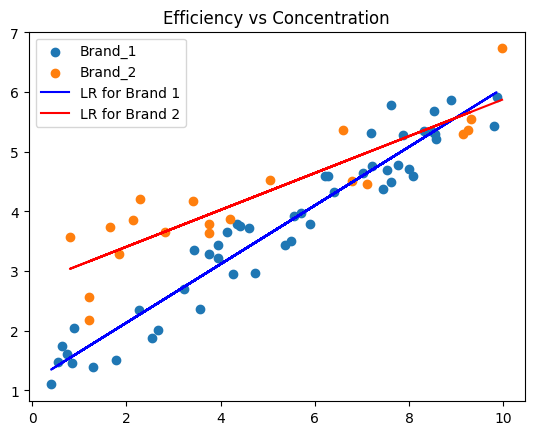

In [4]:
# Regrouper les données par "Brand"
groups = df.groupby('Brand')

# Tracer chaque groupe avec une couleur différente
for name, group in groups:
    plt.scatter(group['Concentration'], group['Efficiency'], label=name)

# Tracer les régressions linéaires pour chaque "Brand"
plt.plot(X1, lr1.predict(X1), color='blue', label='LR for Brand 1')
plt.plot(X2, lr2.predict(X2), color='red', label='LR for Brand 2')

# Ajouter une légende et un titre
plt.legend()
plt.title('Efficiency vs Concentration')

In [5]:
print('Score for Brand 1:', lr1.score(X1, y1))
print('Score for Brand 2:', lr2.score(X2, y2))

Score for Brand 1: 0.932629020148961
Score for Brand 2: 0.7949154120026491


FAIRE DES TESTS STATS DU GENRE: Est-il probable que le produit ne soit pas efficace? Ou alors l'effet est il le meme en fonction du moteur?

On réalise un test de Fisher testant l'influence de la concentration sur l'efficacité. L'hypothèse nulle est "b_1 = 0", soit "le produit n'a pas d'influence". 

- d'abord pour le groupe Brand 1. On choisit un risque d'erreur de 1%.

In [6]:
from scipy.stats import t

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)

def sample_T_n(b_1, beta_1, s, s_x):
    return (b_1 - beta_1)/(s/s_x)

# Prédisez les valeurs à partir des modèles
y1_pred = lr1.predict(X1)

# Calculez les résidus
res1 = y1 - y1_pred

# Effectuez un test t pour le coefficient de Concentration pour Brand_1
b_1 = lr1.coef_[0]
s2_ = s2(y1, y1_pred)
s = np.sqrt(s2_)
s_x = np.std(X1)

print('### On teste H_0: beta_1(Brand1) = 0 ###')
print('Test de Student, sur la variable t = b_1/s/s_x')

T_n = sample_T_n(b_1, 0, s, s_x)

alpha = 5/100
p_fractile = 1-alpha/2
t_fractile = t.ppf(p_fractile, df=len(y1)-2)

print('T_n = ', T_n)
print('P(T_n <= t_{1-alpha/2}) = ', p_fractile)
print('t_{1-alpha/2} = ', t_fractile)
print(f'On rejette H_0 avec un risque {alpha} si |T_n| >= t_{1-alpha/2}: ', abs(T_n) >= t_fractile)



### On teste H_0: beta_1(Brand1) = 0 ###
Test de Student, sur la variable t = b_1/s/s_x
T_n =  [3.68324891]
P(T_n <= t_{1-alpha/2}) =  0.975
t_{1-alpha/2} =  2.0106347546964454
On rejette H_0 avec un risque 0.05 si |T_n| >= t_0.975:  [ True]


-> Donc, avec un risque de 1%, on peut rejeter l'hypothèse nulle et affirmer que le produit a bel et bien un effet (linéaire) sur l'efficacité.

- puis pour le groupe "Brand 2". On choisit un risque d'erreur de 10% (1% ne conduit pas a rejeter l'hypothèse dans ce cas)

In [7]:
# Prédisez les valeurs à partir des modèles
y2_pred = lr2.predict(X2)

# Calculez les résidus
res2 = y2 - y2_pred

# Effectuez un test t pour le coefficient de Concentration pour Brand_1
b_1 = lr2.coef_[0]
s2_ = s2(y2, y2_pred)
s = np.sqrt(s2_)
s_x = np.std(X2)

print('### On teste H_0: beta_1(Brand1) = 0 ###')
print('Test de Student, sur la variable t = b_1/s/s_x')

T_n = sample_T_n(b_1, 0, s, s_x)

alpha = 10/100
p_fractile = 1-alpha/2
t_fractile = t.ppf(p_fractile, df=len(y1)-2)

print('T_n = ', T_n)
print('P(T_n <= t_{1-alpha/2}) = ', p_fractile)
print('t_{1-alpha/2} = ', t_fractile)
print(f'On rejette H_0 avec un risque {alpha} si |T_n| >= t_{1-alpha/2}: ', abs(T_n) >= t_fractile)

### On teste H_0: beta_1(Brand1) = 0 ###
Test de Student, sur la variable t = b_1/s/s_x
T_n =  [1.91891505]
P(T_n <= t_{1-alpha/2}) =  0.95
t_{1-alpha/2} =  1.6772241953450393
On rejette H_0 avec un risque 0.1 si |T_n| >= t_0.95:  [ True]


-> Donc, avec un risque de 10%, on peut rejeter l'hypothèse nulle et affirmer que le produit a bel et bien un effet (linéaire) sur l'efficacité.

Finalement, on teste statistiquement la significativité des différences de coefficient de régression en fonction de la marque. On réalise un test de Fisher d'égalité des moyennes.

Pour ce test, l'hypothése nulle est H0 : " b_0_{Brand_1} = b_0_{Brand_2} "

In [42]:
from scipy import stats

# Obtenez les résidus des deux modèles
res1 = y1 - lr1.predict(X1)
res2 = y2 - lr2.predict(X2)

res_tot = np.concatenate((res1, res2))

# Calculez la statistique de test de Fisher
J = 2
n1 , n2 = len(X1), len(X2)
n = n1 + n2
MSB = ( n1 * np.mean(res1)**2 + n2 * np.mean(res2)**2 - n * np.mean(res_tot)**2) / (J - 1)
MSW = ( np.sum(res1**2) + np.sum(res2**2)  - n1 * np.mean(res1)**2 - n2 * np.mean(res2)**2 ) / (n - J)

f_statistic = MSB / MSW



# Calculez la p-valeur associée
p_value = stats.f.sf(f_statistic, dfn=J-1, dfd=n-J)

# Affichez la statistique de test de Fisher et la p-valeur
print(f"Statistique de test de Fisher : {f_statistic}")
print(f"P-valeur : {p_value}")

np.sum(res1)


Statistique de test de Fisher : 7.046107925532147e-31
P-valeur : 1.0


1.1102230246251565e-14

## Exercice 2


Nous souhaitons développer une méthode d'apprentissage automatique qui quantifie en temps réel le risque de collision d'un drone avec des objets environnants.

Pour y arriver, nous avons embarqué 18 capteurs sur un drone en phase de test et estimé à plusieurs instants son risque de collision avec un autre objet. Un total de 67 observations labellisées ont été enregistrées dans le fichier *Drone_observations.csv*.

Nous allons évaluer dans cet exercice si ces observations nous permettent de mettre en lien les données capteurs avec le niveau de risque. Nous allons aussi évaluer si nous aurions une bonne performance avec un sous-ensemble pertinent des capteurs. Chaque capteur a en effet un poids non négligeable et a besoin d'énergie pour fonctionner, ce qui a un impact sur le temps d'utilisation du drone entre deux rechargements de ses batteries.  

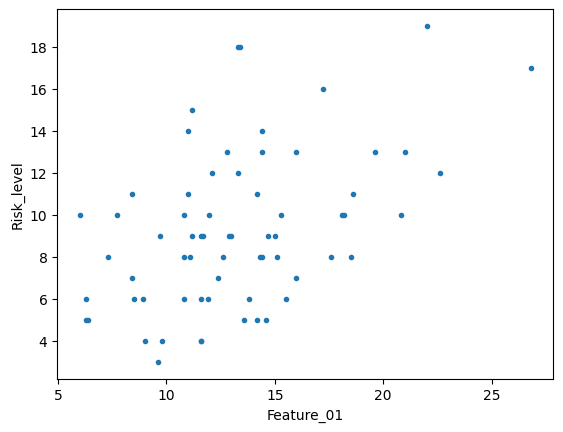

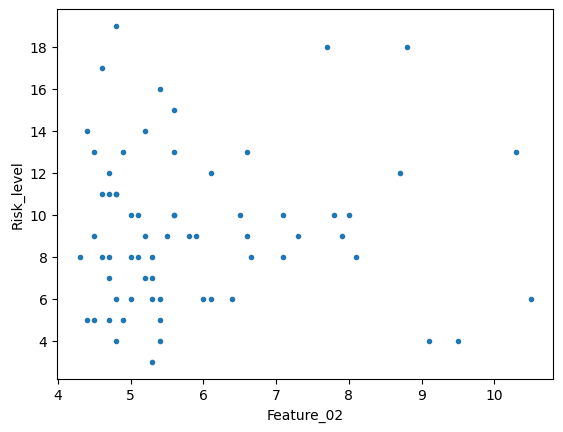

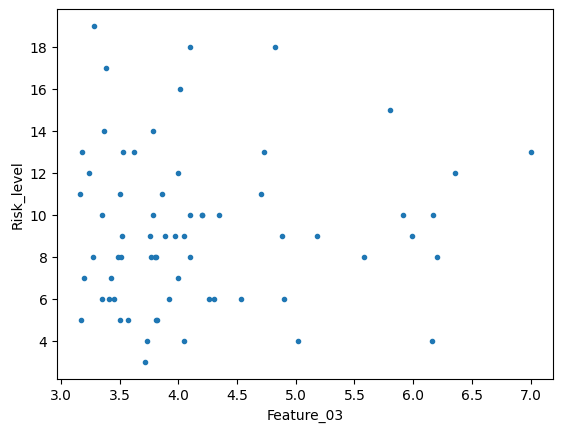

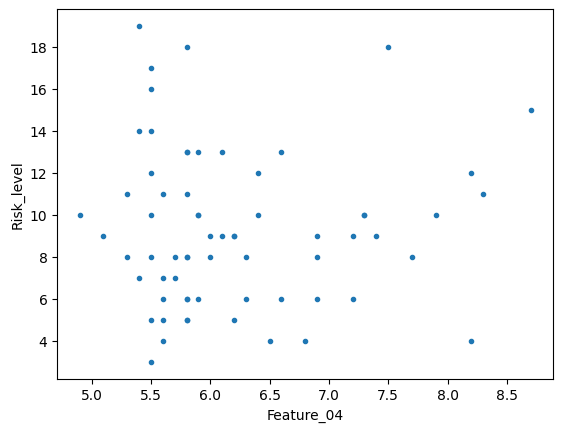

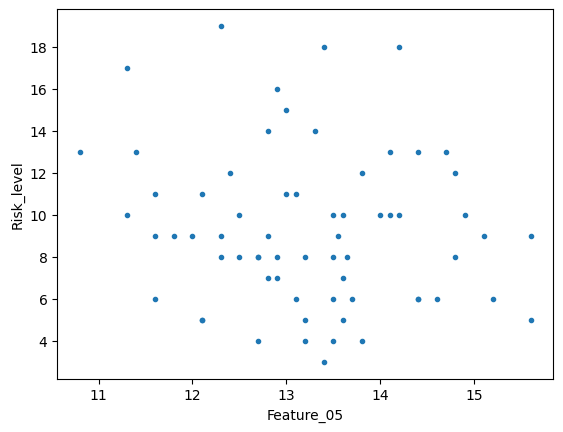

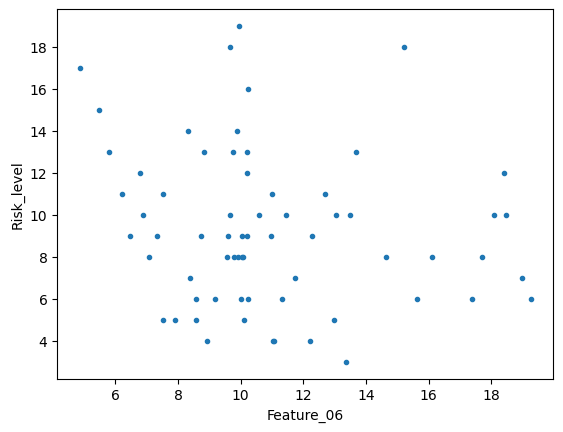

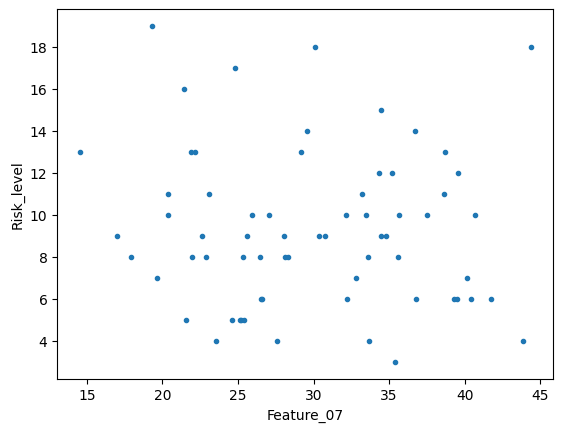

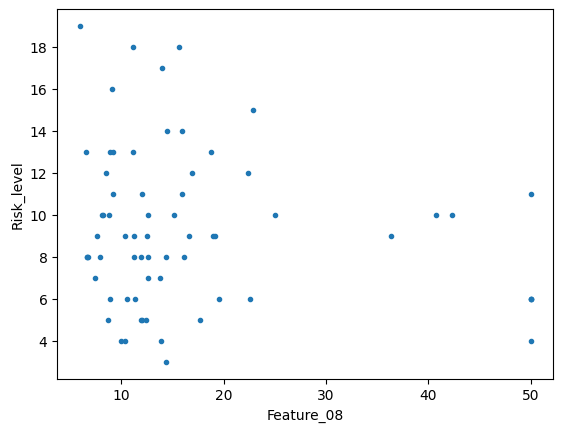

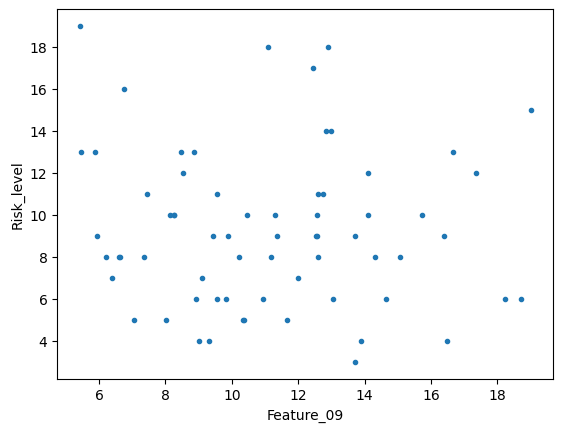

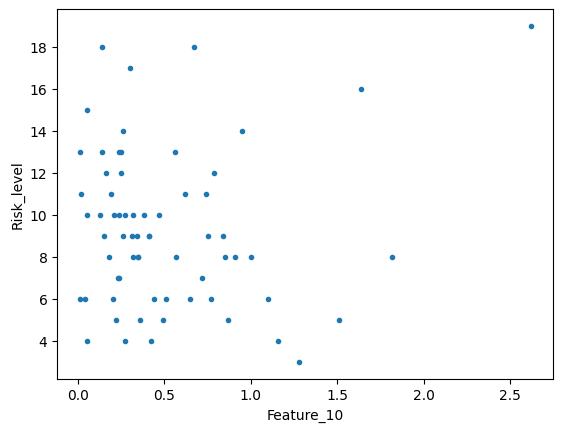

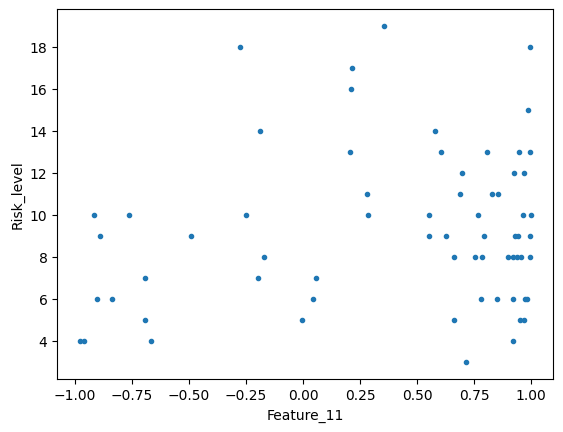

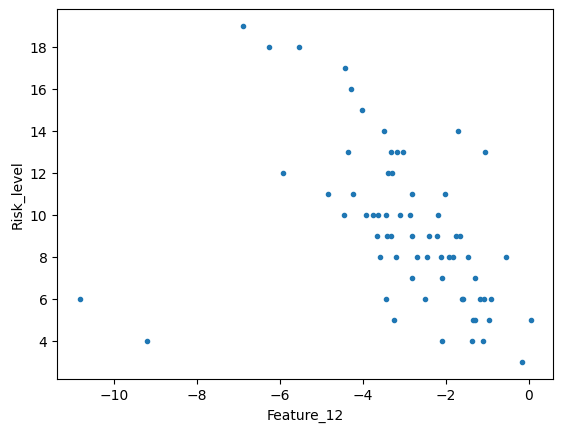

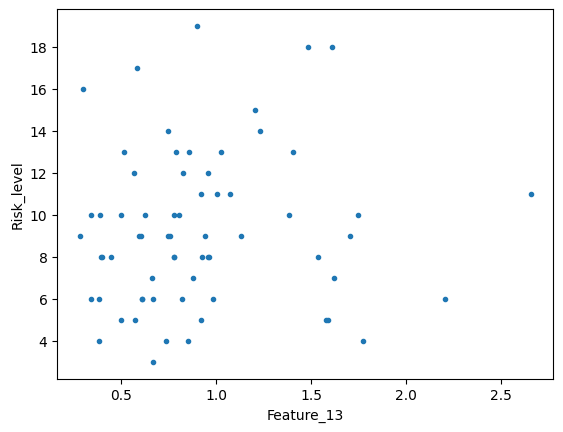

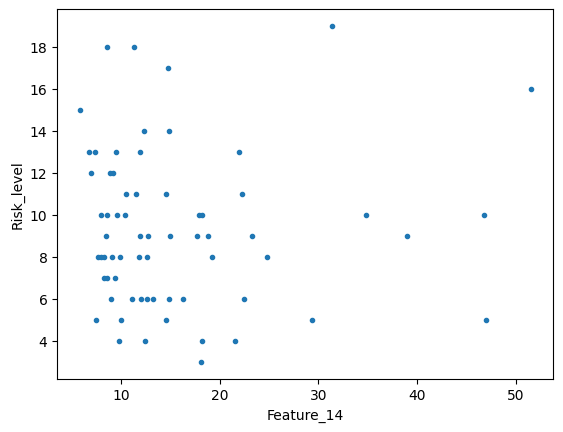

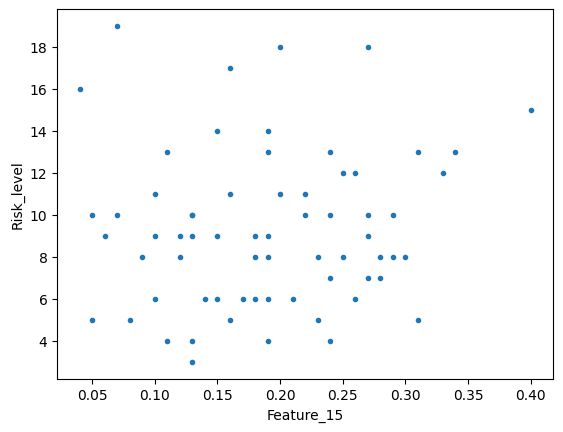

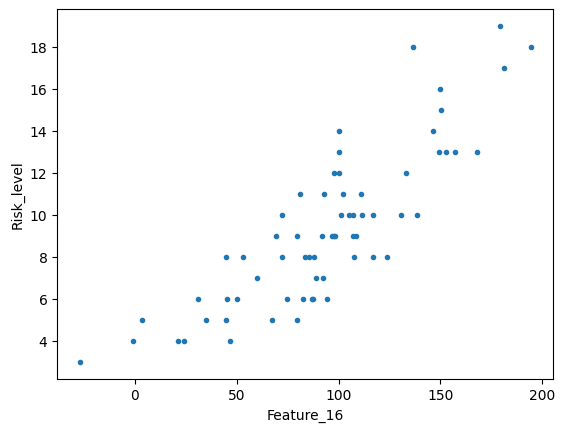

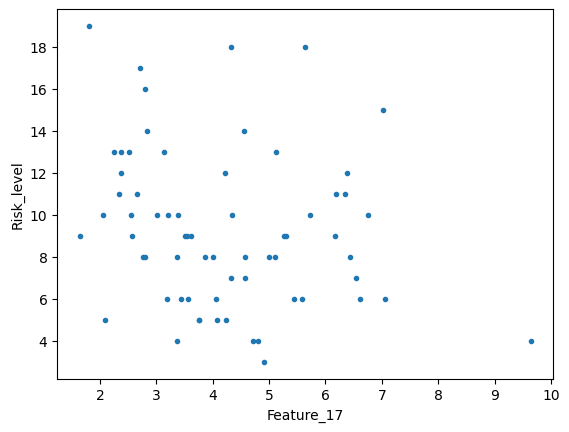

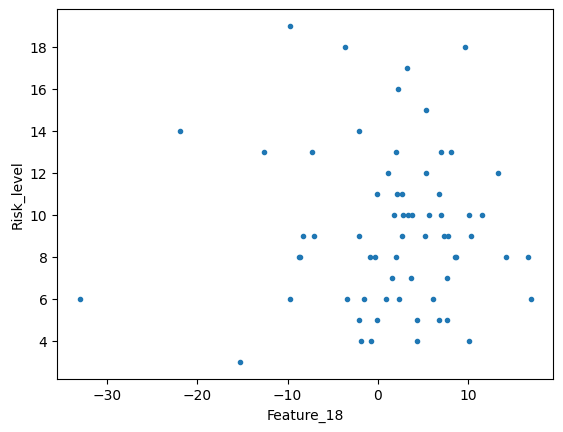

In [9]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing



dataframe=pandas.read_csv("./Drone_observations.csv",sep=';')

listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('Risk_level')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Risk_level')
  plt.show()



### QUESTION 2.1

Observez les données unes par unes. Identifiez-vous visuellement des liens entre certaines variables et la variable *Risk_level*. Si oui, lesquels ?


REPONSE: 

On semble en remarquer des non corrélées, et d'autres corrélées:

- Variable 16, 12, clairement  corrélée lineaire


### QUESTION 2.2
On se demande si il est possible de prédire le niveau de *Risk_level* à partir d'**une seule** des variables *Feature_01*, *Feature_07* ou *Feature_16*.


#### QUESTION 2.2.1
Effectuez une regression linéaire simple entre 'Risk_level' et chacune de ces variables.  Toutes les données seront utilisées pour l'apprentissage. Evaluez alors la qualité des prédictions sur toutes les observations en mesurant l'erreur de prédiction au carré moyenne (MSE). Quel est le risque potentiel en mesurant la qualité des prédictions sur le jeu d'apprentissage ?

#### QUESTION 2.2.2
En utilisant une méthode de validation croisée de type 4-folds, pouvez-vous dire laquelle de ces trois variables semble être la plus fiable pour prédire le risque à l'aide d'un modèle linéaire ?


#### QUESTION 2.2.3
Peut-on statistiquement affirmer qu'il existe une relation significative entre *Risk_level* et (indépendament) *Feature_01*, *Feature_07* ou bien *Feature_16* ? Si oui, décrivez votre procédure de test.


In [10]:
#2.2.1

X01 = np.array(dataframe['Feature_01']).reshape(-1,1)
X07 = np.array(dataframe['Feature_07']).reshape(-1,1)
X16 = np.array(dataframe['Feature_16']).reshape(-1,1)
y = np.array(dataframe['Risk_level']).reshape(-1,1)

lr01 = LinearRegression()
lr01.fit(X01,y)
print('Feature 1 score =', lr01.score(X01,y))

lr07 = LinearRegression()
lr07.fit(X07,y)
print('Feature 07 score =', lr07.score(X07,y))

lr16 = LinearRegression()
lr16.fit(X16,y)
print('Feature 16 score =', lr16.score(X16,y))


Feature 1 score = 0.22756273597159693
Feature 07 score = 0.004548326580904538
Feature 16 score = 0.717484844408153


Ces résultats donnent une première idée de la capacité des variables a expliquer le risque individuellement ( Feature 16 semble la meilleure des 3), mais il faut faire attention à l'overfitting, ici on valide sur nos données d'entraînement. Problème de généralisation.

In [11]:
#2.2.2

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

nb_folds = 4
kf = KFold(n_splits=nb_folds)


### Feature 01
sum_mse_scores=0.
for train,test in kf.split(X01):
    X_train=X01[train]
    y_train=y[train]
    X_test=X01[test]
    y_test=y[test]

    lr = LinearRegression()
    lr.fit(X_train,y_train)

    y_pred = lr.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    sum_mse_scores+= mse_score


print("Feature 01, 4-Folds MSE =", sum_mse_scores/nb_folds)

### Feature 07
sum_mse_scores=0.
for train,test in kf.split(X07):
    X_train=X07[train]
    y_train=y[train]
    X_test=X07[test]
    y_test=y[test]

    lr = LinearRegression()
    lr.fit(X_train,y_train)

    y_pred = lr.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    sum_mse_scores+= mse_score

print("Feature 07, 4-Folds MSE =", sum_mse_scores/nb_folds)

### Feature 16
sum_mse_scores=0.
for train,test in kf.split(X16):
    X_train=X16[train]
    y_train=y[train]
    X_test=X16[test]
    y_test=y[test]

    lr = LinearRegression()
    lr.fit(X_train,y_train)

    y_pred = lr.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    sum_mse_scores+= mse_score

print("Feature 16, 4-Folds MSE =", sum_mse_scores/nb_folds)

Feature 01, 4-Folds MSE = 10.938813503318638
Feature 07, 4-Folds MSE = 15.209387726987929
Feature 16, 4-Folds MSE = 4.083669877334086


Avec une validation croisée 4-folds, on peut plus légitimement généraliser. Ici la MSE la plus faible est celle de Feature 16, ce qui semble cohérent avec le résultat précédent.

In [12]:
#2.2.3

#PROCEDURE DE TEST???


### QUESTION 2.3
On s'intéresse maintenant au lien entre les variables *Risk_level* et *Feature_12*. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

Définissez une procédure pour détecter automatiquement les deux données aberrantes dans un jeu de données. Cette procédure fera l'hypothèse que 10\% des observations peuvent ne pas être fiables.

#### QUESTION 2.3.2

Nous supprimerons dans la suite de cet exercice les deux observations qui sont aberrantes sur la variable *Feature_12*. Comment auriez-vous traité ces observations si vous aviez voulu préserver l'information qu'elles contiennent dans les autres variables ?


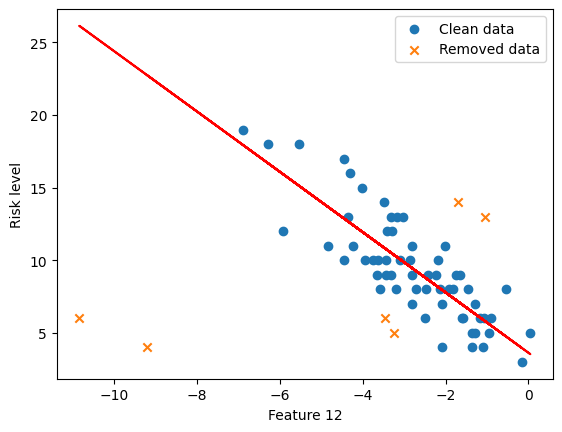

In [13]:
#2.3.1

from itertools import combinations
from tqdm import tqdm

def remove_abs(X,y_,percent_abs):
    n = X.shape[0]
    nb_abs = (n * percent_abs )//100

    X_clean = X
    y_clean = y_

    index_removed = []
    for i in range(nb_abs):
        lr = LinearRegression()
        lr.fit(X_clean,y_clean)
        y_pred = lr.predict(X_clean)

        errors = np.abs(y_pred - y_clean)
        index = np.argmax(errors)
        X_clean = np.delete(X_clean, index, 0)
        y_clean = np.delete(y_clean, index, 0)
        index_removed.append(index)

    #We need to update the index of the removed points
    for i in range(1,len(index_removed)):
        if index_removed[i] >= index_removed[i-1]:
            index_removed[i] += 1
        

    return X_clean, y_clean, index_removed


X12 = np.array(dataframe['Feature_12']).reshape(-1,1)
X12_clean, y_clean, index_abs = remove_abs(X12,y,10)
lr = LinearRegression()
lr.fit(X12_clean,y_clean)

plt.figure()
plt.scatter(X12_clean,y_clean, label='Clean data')
plt.scatter(X12[index_abs],y[index_abs], label='Removed data', marker='x')
plt.xlabel('Feature 12')
plt.ylabel('Risk level')
plt.legend()

plt.plot(X12, lr.predict(X12), color='red')


In [14]:
#2.3.2

#???????


### QUESTION 2.4

Parmis les 18 variables observées, on souhaite maintenant sélectionner automatiquement celles qui nous permettraient de prédire au mieux *Risk_level* à l'aide de la régression multiple avec un terme de régularisation. Décrivez votre démarche et vos résultats. En particulier, le compromis à trouver entre nombre de variables sélectionnées et qualité de prédiction pourra être discuté.

